## DSC 180B: Final Project Code

#### Names: Viswesh Uppalapati and Skylar Wang
#### Section: A10

In [1]:
from twarc.client import Twarc
import pandas as pd
import numpy as np
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
import jsonlines
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from os import path
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
from nltk.corpus import stopwords
from nltk.util import ngrams

### Download Data
Tweets from the first of each month has been downloaded and uploaded to github

In [4]:
def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

In [47]:
files = [44,75,105,136,167,197,228,258,289,320,348,379,409,440,470,501,532,562,593,623,654,685]
tweet_ids=[]
for i in files:
    url = "https://github.com/skylarmwang/DSC180B/blob/main/corona_tweets_"+str(i)+".zip?raw=true"
    download_and_unzip(url)
    df = pd.read_csv('corona_tweets_'+str(i)+'.csv',header=None)
    os.remove('corona_tweets_'+str(i)+'.csv')
    subset = np.random.choice(df[0],100000,replace = False)
    tweet_ids.extend(subset)

In [6]:
consumer_key="Nv6AcRFLii6k2sBZ1EF9WUhJG"
consumer_secret="H6wO7AN4enBzk9lONk3msphzdoJ0KWXBqQer7T8y6Ebg4Sbf5u"
access_token="1445830297497440256-Ypj1FSpiMuNr5mj3C27eW9ZpFjvgQb"
access_token_secret="wb9AsvnABEZEiIpzCiJxoFh8QgrGJXEVGAcgOoSCPCKXn"

text=[]
t = Twarc(consumer_key, consumer_secret, access_token, access_token_secret)
for tweet in t.hydrate(tweet_ids[0:100]):
    text.append(tweet['full_text'])

In [12]:
zip = ZipFile('data.zip')
zip.extractall()

In [19]:
# proportion of them containing links
link_count = 0
total_count = 0
user_dict = dict()
num_retweets = 0
for x in range(0, 2200001, 100000):
    if x == 0:
        continue
    print("current: " + str(x))
    with jsonlines.open("tweets" + str(x) + ".jsonl") as reader:
        for obj in reader:
            
            if obj is not None:
                
                # for proportion of missing data
                total_count += 1
                
                # for number of unique users and for dist of tweets per user
                if obj['user']['id'] in user_dict.keys():
                    user_dict[obj['user']['id']] += 1
                else:
                    user_dict[obj['user']['id']] = 1
                
                # count number of tweets that are retweets
                if "retweeted_status" in obj.keys():
                    num_retweets += 1
                
                # for proportion of data that contains a url
                if "//t.co/" in obj['full_text']:
                    link_count += 1
                
    print("Total tweets: " + str(total_count))
    print("Total tweets with links: " + str(link_count))
    print("Total retweets: " + str(num_retweets))
    print("done")

current: 100000
Total tweets: 67894
Total tweets with links: 23114
Total retweets: 48056
done
current: 200000
Total tweets: 134726
Total tweets with links: 40834
Total retweets: 96622
done
current: 300000
Total tweets: 202709
Total tweets with links: 59645
Total retweets: 145535
done
current: 400000
Total tweets: 268066
Total tweets with links: 75570
Total retweets: 193139
done
current: 500000
Total tweets: 334959
Total tweets with links: 92044
Total retweets: 241690
done
current: 600000
Total tweets: 403802
Total tweets with links: 111771
Total retweets: 288852
done
current: 700000
Total tweets: 469353
Total tweets with links: 130341
Total retweets: 330897
done
current: 800000
Total tweets: 540312
Total tweets with links: 153883
Total retweets: 373165
done
current: 900000
Total tweets: 608383
Total tweets with links: 170655
Total retweets: 418489
done
current: 1000000
Total tweets: 686355
Total tweets with links: 193357
Total retweets: 470940
done
current: 1100000
Total tweets: 764250

In [20]:
# Proportion of Missing Data in the Dataset (Tweets are None)

1 - (total_count / 2200000)

0.24926727272727278

In [21]:
# Proportion of TOTAL TWEETS that contain a URL

link_count / total_count

0.2652669028803375

In [22]:
# Proportion of TOTAL TWEETS that are retweets

num_retweets / total_count

0.6834752956505523

In [23]:
# number of unique users

len(user_dict.keys())

1055997

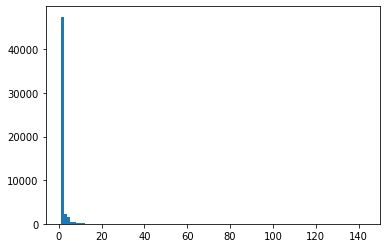

In [25]:
# distribution of tweets per user
user_counts = list(user_dict.values())
for i in range(1):
    plt.figure()
    plt.hist(np.random.choice(user_counts, int(0.05 * len(user_counts))), bins = 100)
plt.show()

In [ ]:
# hydrating the tweets and writing them to file test with first 200k tweets
prev = 0
store = []
for x in range(0, 2200001, 20000):
    if x == 0:
        continue
    
    subset = tweet_ids[prev:x]
    
    try:
        curr_tweets = t.hydrate(iter(subset))
        for tweet in curr_tweets:
            store.append(tweet)
    
        if x % 100000 == 0:
            with jsonlines.open("tweets" + str(x) + ".jsonl", mode='w') as writer:
                writer.write_all(store)
                store = []
                writer.close()
        
    except:
        print("prev: " + str(prev))
        print("x: " + str(x))
        
    print(str(prev) + "-" + str(x))
    prev = x

In [63]:
def create_wordcloud(text,month):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=300,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    f_name = month+'.png'
    wc.to_file(f_name)
    #print("Word Cloud Saved Successfully")
    path=f_name
    display(Image.open(path))

current: 100000


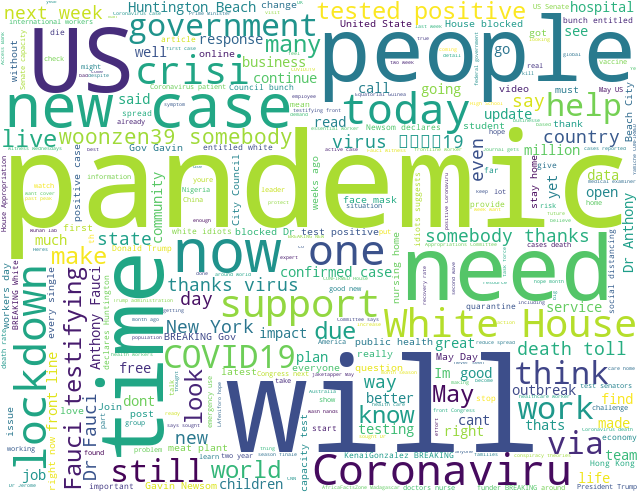

current: 200000


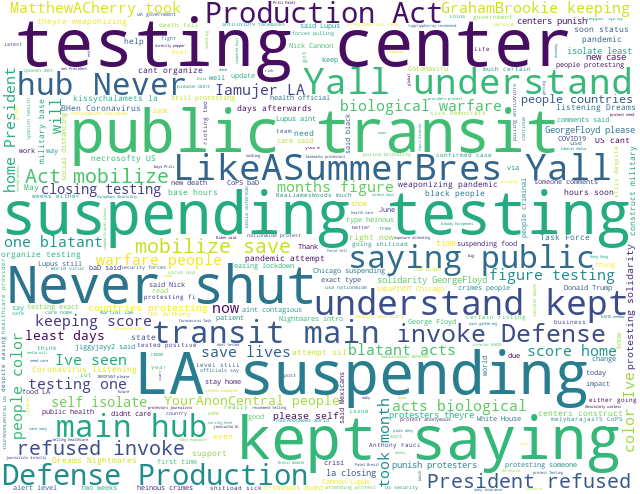

current: 300000


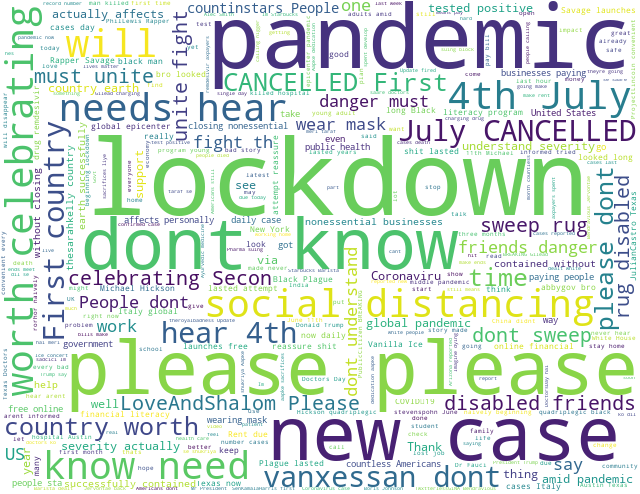

current: 400000


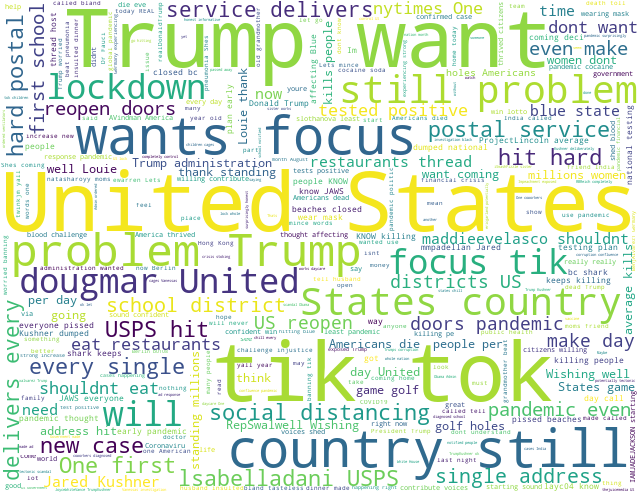

current: 500000


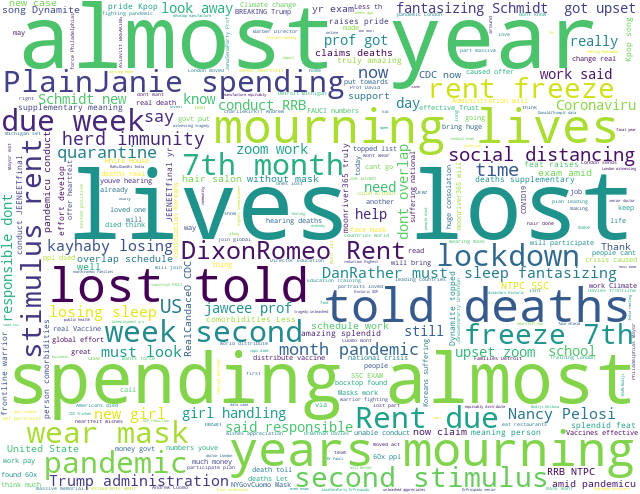

current: 600000


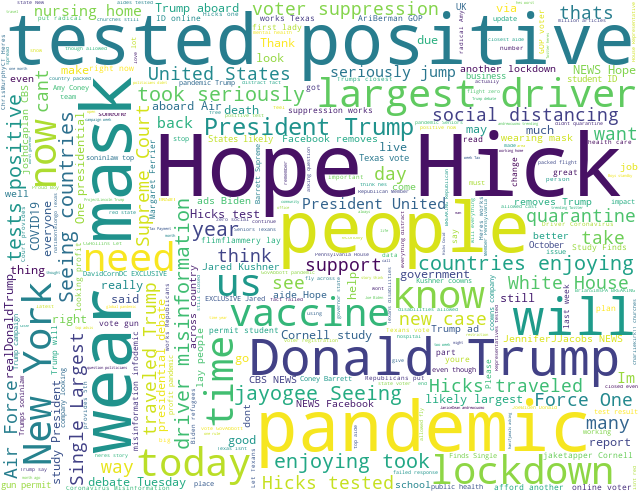

current: 700000


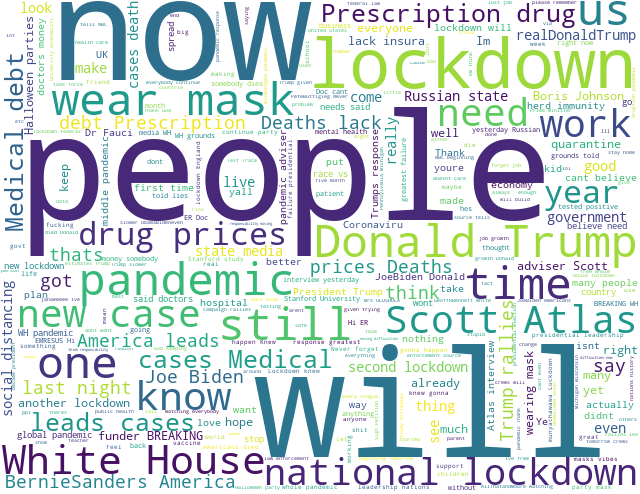

current: 800000


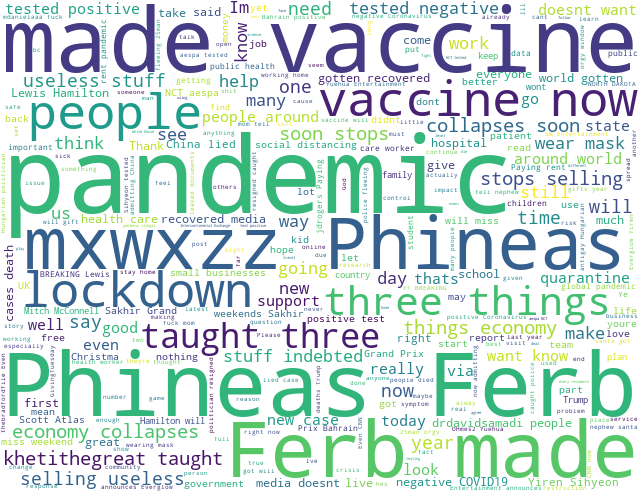

current: 900000


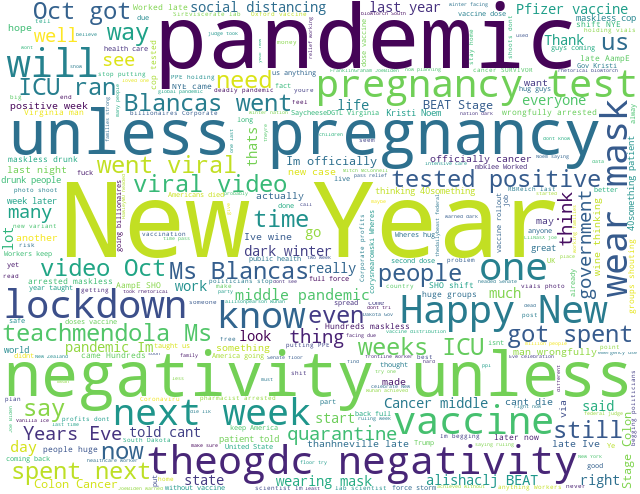

current: 1000000


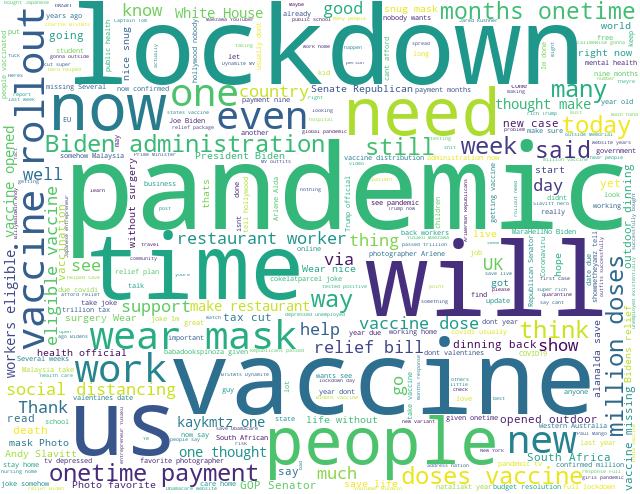

current: 1100000


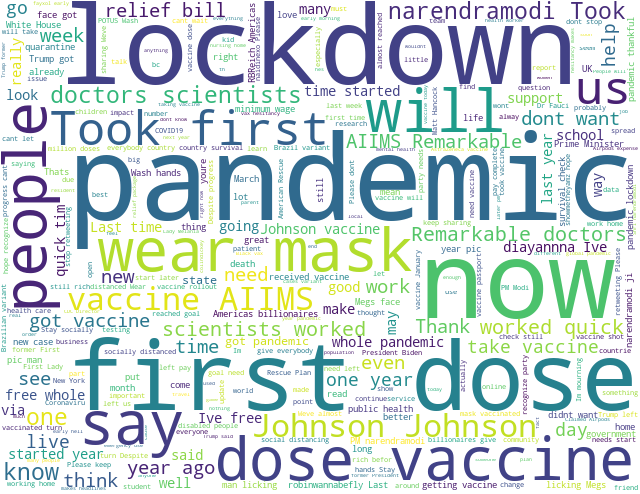

current: 1200000


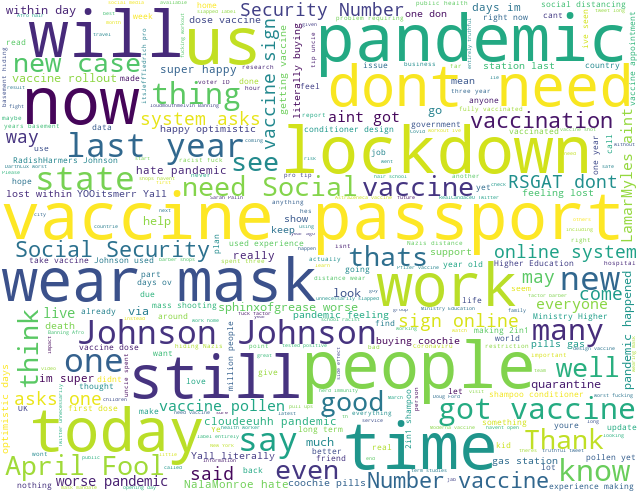

current: 1300000


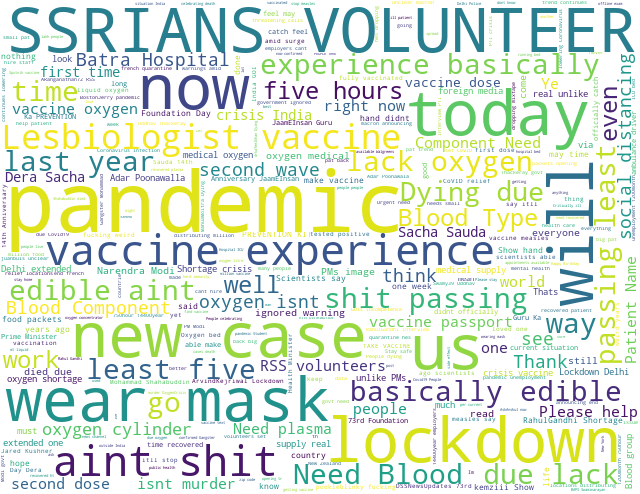

current: 1400000


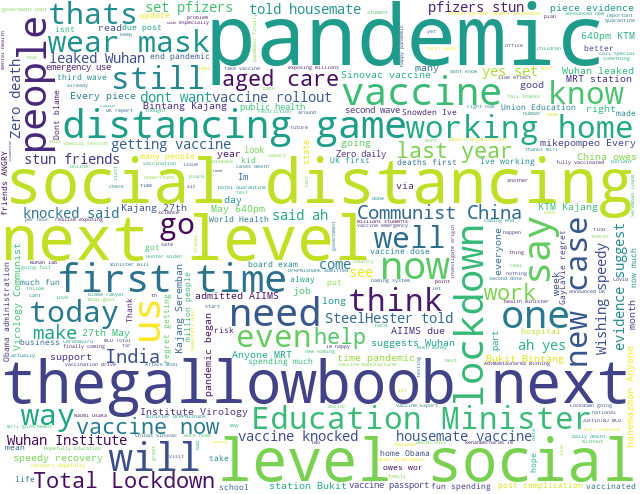

current: 1500000


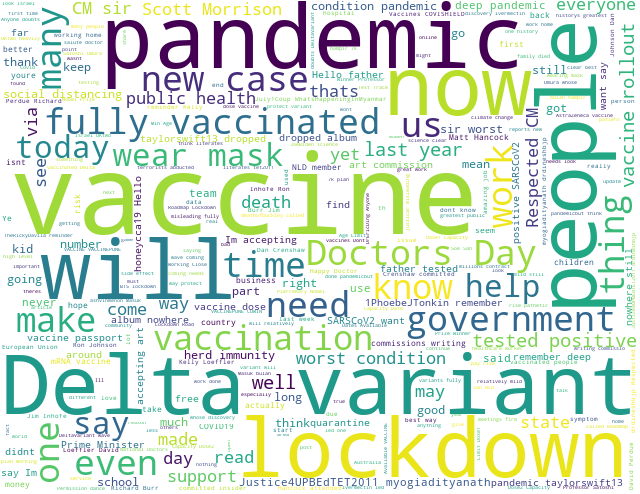

current: 1600000


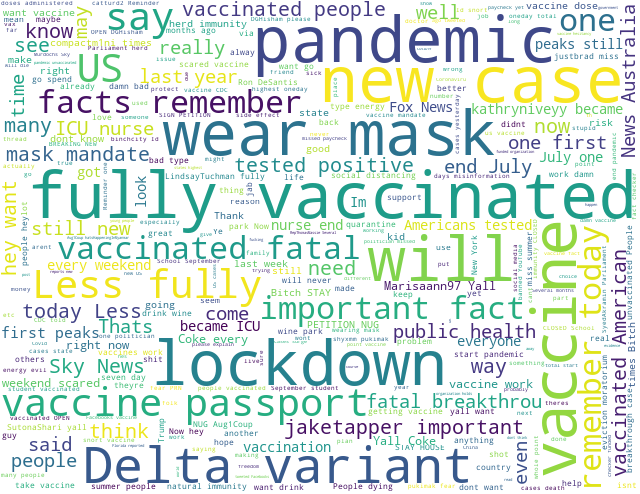

current: 1700000


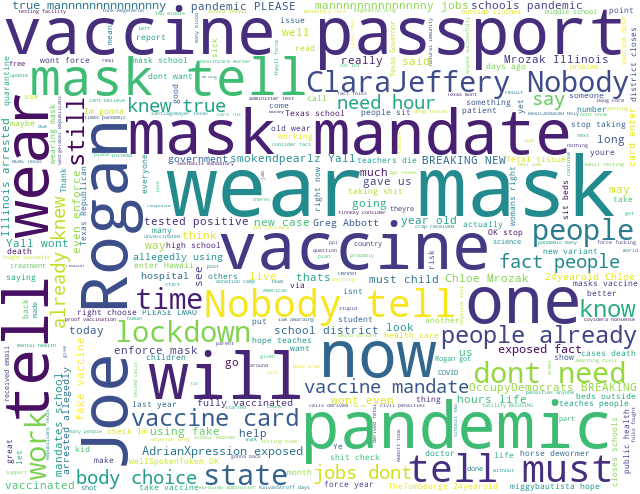

current: 1800000


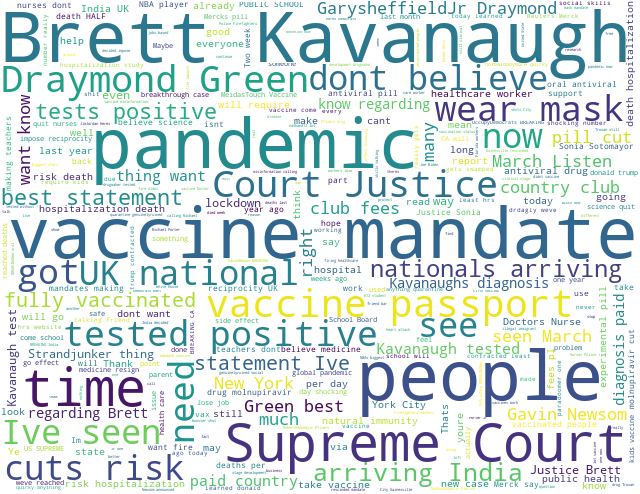

current: 1900000


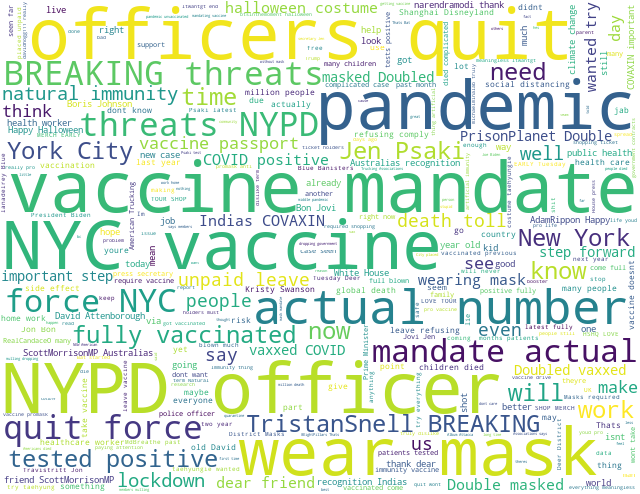

current: 2000000


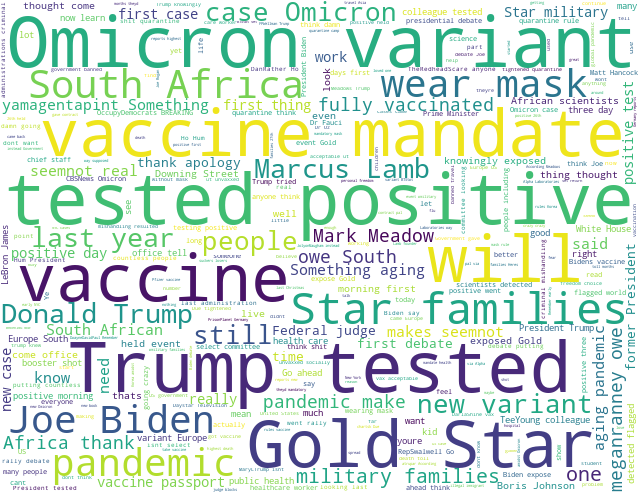

current: 2100000


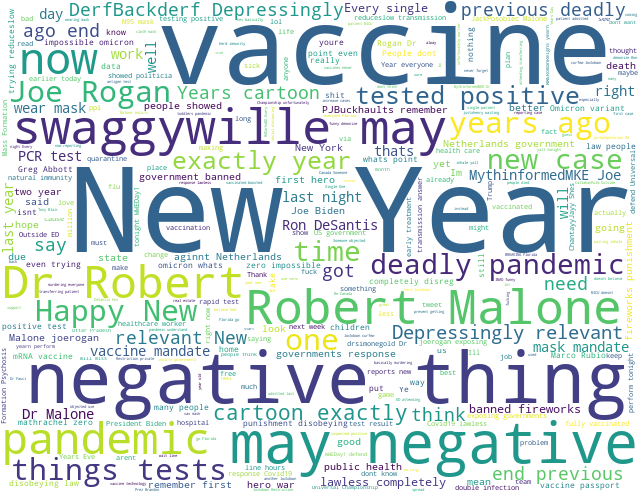

current: 2200000


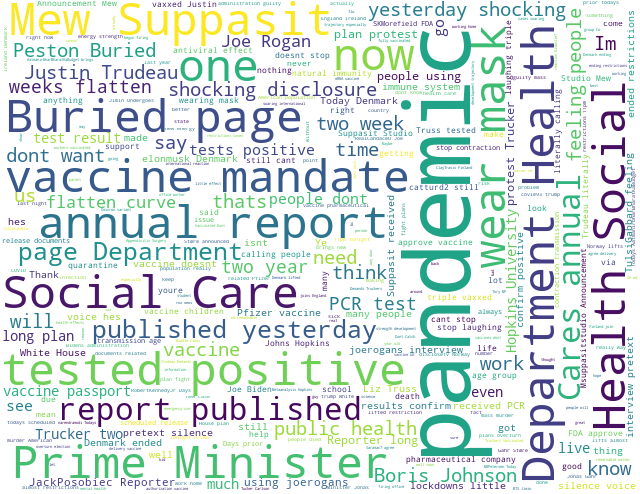

In [195]:
text = []
y=0
#months = ['0520','0620','0720','0820','0920','1020','1120','1220','0121','0221','0321','0421','0521','0621','0721','0821','0921','1021','1121','1221',
#         '0122','0222']
for x in range(0, 2200001, 100000):
    if x == 0:
        continue
    print("current: " + str(x))
    with jsonlines.open("tweets" + str(x) + ".jsonl") as reader:
        for obj in reader:
            if obj is not None:
                t = preprocess(obj['full_text'])
                text.append(t)
                #if y==100:
                    #break
                #if text!='':
                    #sentiment(text,str(x))
                y+=1
            
        text = "".join(text)
        create_wordcloud(text,str(x))
        
        text=[]
    
               

In [4]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [5]:
def preprocess(text):
    new_text = []
    punc = '''!()-[]{};:'"\,<>./?#@$%^&*_~'''
    starts = ['@','\\u','http','https','http co','https co']
    words = ['virus','Corona','RT','amp','Covid19','covid','COVID','COVID19','coronavirus','corona virus','COVID 19','covid19','Covid','https','http','corona']
    for t in text.split(" "):
        e=[]
        for ele in t:
            ele = deEmojify(ele)
            if ele in punc:
                ele=''
            e.append(ele)
        t = ''.join(e)
        t = re.sub(r'[^\w\s]', '', t)
        while t.startswith('\n'):
            t = t[2:]
        for s in starts:
            t = '' if t.startswith(s) else t
        for w in words:
            t.replace(w, "")
            t='' if t==w else t

        new_text.append(t)
    #print(new_text)
    new_text = " ".join(new_text)
    
    #print(new_text)
    return new_text

In [91]:
def keyword(key):
    scores = []
    #y=0
    #months = ['0520','0620','0720','0820','0920','1020','1120','1220','0121','0221','0321','0421','0521','0621','0721','0821','0921','1021','1121','1221',
    #         '0122','0222']
    for x in range(0, 2200001, 100000):
        if x == 0:
            continue
        print("current: " + str(x))
        neutrals = 0
        positives = 0
        negatives = 0
        total = 0
        
        with jsonlines.open("tweets" + str(x) + ".jsonl") as reader:
            for obj in reader:
                if obj is not None:
                    t = preprocess(obj['full_text'])
                    if total==1000:
                        break
                    if t is not None and key in t:
                        #print('hi')
                        s=sentiment(t,str(x))
                        total+=1
                        for i in s:
                            if i[0]=='neutral':
                                neutrals+=i[1]
                            elif i[0]=='positive':
                                positives+=i[1]
                            else:
                                negatives+=i[1]
        
        print('positive '+str(np.round(float(positives/total), 4)))
        print('neutral '+str(np.round(float(neutrals/total), 4)))
        print('negative '+str(np.round(float(negatives/total), 4)))
        print()
        scores.append([np.round(float(positives/total), 4),np.round(float(neutrals/total), 4),np.round(float(negatives/total), 4)])
    return scores

In [58]:
print('lockdown')
lockdown = keyword('lockdown')

lockdown
current: 100000
positive 0.1455
neutral 0.537
negative 0.3175

current: 200000
positive 0.1082
neutral 0.5102
negative 0.3816

current: 300000
positive 0.1834
neutral 0.4694
negative 0.3472

current: 400000
positive 0.1842
neutral 0.4564
negative 0.3595

current: 500000
positive 0.1624
neutral 0.4306
negative 0.407

current: 600000
positive 0.1326
neutral 0.4467
negative 0.4206

current: 700000
positive 0.1352
neutral 0.4854
negative 0.3794

current: 800000
positive 0.1623
neutral 0.4445
negative 0.3932

current: 900000
positive 0.1635
neutral 0.4148
negative 0.4217

current: 1000000
positive 0.1732
neutral 0.4841
negative 0.3427

current: 1100000
positive 0.1706
neutral 0.4322
negative 0.3973

current: 1200000
positive 0.1545
neutral 0.4665
negative 0.379

current: 1300000
positive 0.1372
neutral 0.4939
negative 0.3689

current: 1400000
positive 0.1217
neutral 0.4832
negative 0.3952

current: 1500000
positive 0.1711
neutral 0.4521
negative 0.3769

current: 1600000
positive 0.

In [92]:
# importing package
def create_plot(word,w):
    import matplotlib.pyplot as plt

    p = []
    n = []
    neg = []
    for i in word:
        p.append(i[0])
        n.append(i[1])
        neg.append(i[2])
    months = ['05/20','06/20','07/20','08/20','09/20','10/20','11/20','12/20','01/21','02/21','03/21','04/21','05/21','06/21','07/21','08/21','09/21','10/21','11/21','12/21',
                 '01/22','02/22']
    plt.plot(months, p, label = "positive")
    plt.plot(months, n, label = "neutral")
    plt.plot(months, neg, label = "negative")
    plt.title('Sentiment Changes of \"'+w+'\" Overtime')
    plt.legend()
    plt.tight_layout()
    plt.xticks(fontsize=5)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    #plt.figure(figsize=(100,30))
    plt.savefig(w+'.png', dpi = 300)
    plt.show()


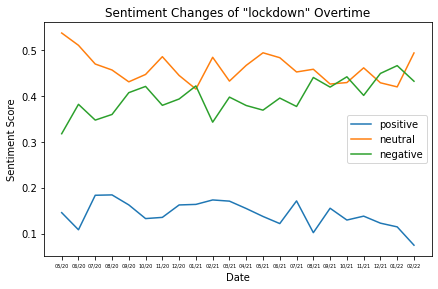

In [87]:
create_plot(lockdown,'lockdown')

mask
current: 100000
positive 0.1653
neutral 0.5027
negative 0.332

current: 200000
positive 0.1536
neutral 0.4337
negative 0.4127

current: 300000
positive 0.1042
neutral 0.4368
negative 0.459

current: 400000
positive 0.1256
neutral 0.4547
negative 0.4197

current: 500000
positive 0.1064
neutral 0.466
negative 0.4276

current: 600000
positive 0.1278
neutral 0.482
negative 0.3902

current: 700000
positive 0.1484
neutral 0.4587
negative 0.3929

current: 800000
positive 0.1376
neutral 0.4462
negative 0.4162

current: 900000
positive 0.1703
neutral 0.3497
negative 0.48

current: 1000000
positive 0.2337
neutral 0.453
negative 0.3133

current: 1100000
positive 0.1008
neutral 0.4131
negative 0.486

current: 1200000
positive 0.1312
neutral 0.4491
negative 0.4197

current: 1300000
positive 0.1242
neutral 0.4529
negative 0.4229

current: 1400000
positive 0.118
neutral 0.4257
negative 0.4564

current: 1500000
positive 0.124
neutral 0.4746
negative 0.4013

current: 1600000
positive 0.0859
neutra

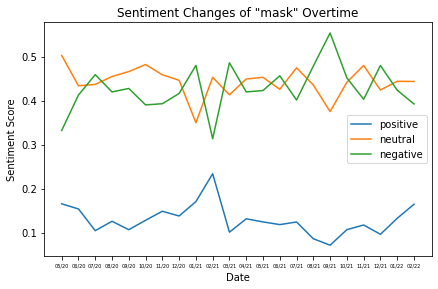

In [88]:
print('mask')
mask = keyword('mask')
create_plot(mask,'mask')

vaccine
current: 100000
positive 0.1792
neutral 0.5687
negative 0.2521

current: 200000
positive 0.1632
neutral 0.4789
negative 0.3579

current: 300000
positive 0.2619
neutral 0.4827
negative 0.2555

current: 400000
positive 0.1653
neutral 0.532
negative 0.3027

current: 500000
positive 0.1081
neutral 0.464
negative 0.428

current: 600000
positive 0.1439
neutral 0.4993
negative 0.3568

current: 700000
positive 0.1211
neutral 0.4811
negative 0.3978

current: 800000
positive 0.1336
neutral 0.6225
negative 0.2439

current: 900000
positive 0.1436
neutral 0.4507
negative 0.4057

current: 1000000
positive 0.161
neutral 0.4833
negative 0.3556

current: 1100000
positive 0.1991
neutral 0.517
negative 0.2838

current: 1200000
positive 0.1648
neutral 0.4852
negative 0.3501

current: 1300000
positive 0.1433
neutral 0.4671
negative 0.3896

current: 1400000
positive 0.1419
neutral 0.4619
negative 0.3962

current: 1500000
positive 0.1428
neutral 0.4746
negative 0.3826

current: 1600000
positive 0.108

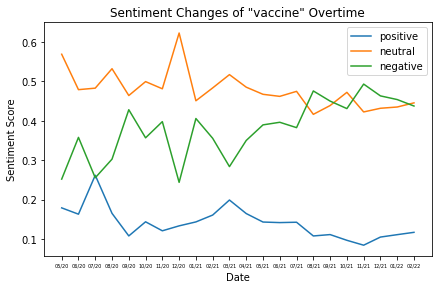

In [89]:
print('vaccine')
vaccine = keyword('vaccine')
create_plot(vaccine,'vaccine')

Trump
current: 100000
positive 0.1157
neutral 0.4371
negative 0.4472

current: 200000
positive 0.0567
neutral 0.3872
negative 0.5561

current: 300000
positive 0.0819
neutral 0.368
negative 0.5501

current: 400000
positive 0.0517
neutral 0.299
negative 0.6494

current: 500000
positive 0.0456
neutral 0.3343
negative 0.6201

current: 600000
positive 0.074
neutral 0.4779
negative 0.4481

current: 700000
positive 0.0669
neutral 0.3558
negative 0.5773

current: 800000
positive 0.0845
neutral 0.3693
negative 0.5462

current: 900000
positive 0.0668
neutral 0.3352
negative 0.598

current: 1000000
positive 0.0486
neutral 0.3209
negative 0.6305

current: 1100000
positive 0.0723
neutral 0.415
negative 0.5127

current: 1200000
positive 0.0777
neutral 0.4501
negative 0.4722

current: 1300000
positive 0.0698
neutral 0.4034
negative 0.5269

current: 1400000
positive 0.0658
neutral 0.4269
negative 0.5073

current: 1500000
positive 0.0718
neutral 0.3846
negative 0.5436

current: 1600000
positive 0.0706


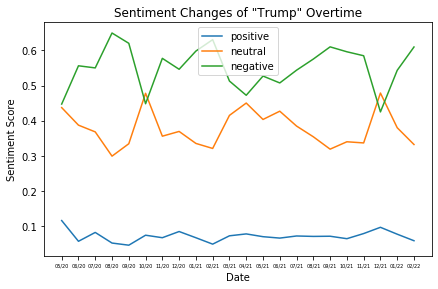

In [93]:
print('Trump')
Trump = keyword('Trump')
create_plot(Trump,'Trump')

In [ ]:
print('Delta')
Delta = keyword('Delta')
create_plot(Delta,'Delta')

Delta
current: 100000
positive 0.1802
neutral 0.5556
negative 0.2642

current: 200000
positive 0.157
neutral 0.5789
negative 0.264

current: 300000
positive 0.1404
neutral 0.6227
negative 0.2368

current: 400000
positive 0.1957
neutral 0.5771
negative 0.2271

current: 500000


In [ ]:
print('Biden')
mask = keyword('Biden')
create_plot(mask,'Biden')

In [ ]:
print('Omicron')
Biden = keyword('Biden')
create_plot(Biden,'Biden')

In [6]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [7]:
def sentiment(text,month):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    r = []
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        r.append([l,np.round(float(s), 4)])
    return r

In [ ]:
word_dict = dict()
for x in range(0, 2200001, 100000):
    if x == 0:
        continue
    print("current: " + str(x))
    with jsonlines.open("data/tweets" + str(x) + ".jsonl") as reader:
        for obj in reader:
            if obj is not None:
                tokens = preprocess(obj['full_text']).strip().split(' ')
                for token in tokens:
                    if token not in word_dict:
                        word_dict[token] = 0
                    word_dict[token] += 1
                
    print("done")

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')
temp = pd.DataFrame(word_dict.values(), index = word_dict.keys()).sort_values(0, ascending = False)
for x in stop:
    if x in temp.index:
        temp = temp.drop(x, axis = 0)

In [ ]:
temp = temp.drop(["Covid19"], axis = 0)

In [ ]:
bigram_dict = dict()
for x in range(0, 2200001, 100000):
    if x == 0:
        continue
    print("current: " + str(x))
    with jsonlines.open("data/tweets" + str(x) + ".jsonl") as reader:
        for obj in reader:
            if obj is not None:
                tokens = preprocess(obj['full_text']).strip().split(' ')
                bigram = list(ngrams(tokens, 2))
                for gram in bigram:
                    if gram not in bigram_dict:
                        bigram_dict[gram] = 0
                    bigram_dict[gram] += 1
                
    print("done")

In [ ]:
temp2 = pd.DataFrame(bigram_dict.values(), index = bigram_dict.keys()).sort_values(0, ascending = False)
temp2[25:50]